In [3]:
#importing the required libraries

In [4]:
import pandas as pd  
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns

%matplotlib inline

In [5]:
#Importing the Dataset

In [49]:
reservations = pd.read_csv("Hotel Reservations.csv")
reservations.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [50]:
#Checking for any NULL values if any, and also checking for the datatypes.

In [51]:
reservations.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [52]:
reservations.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [53]:
reservations.corr()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.011429,0.097287,0.076719,0.021841,0.026338,-0.192277,-0.047426,-0.119166,0.296886,0.189401
no_of_children,-0.019787,1.000000,0.029478,0.024398,0.034244,-0.047091,0.045983,-0.003076,0.025482,-0.036348,-0.016390,-0.021189,0.337728,0.124486
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.031111,0.046595,0.055357,-0.009894,0.027304,-0.067107,-0.020690,-0.026312,-0.004525,0.060593
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,-0.048784,0.149650,0.032672,0.037376,-0.009305,-0.099764,-0.030080,-0.049344,0.022753,0.045994
required_car_parking_space,0.011429,0.034244,-0.031111,-0.048784,1.000000,-0.066445,0.015684,-0.015505,-0.000037,0.110909,0.027106,0.063810,0.061304,0.087922
lead_time,0.097287,-0.047091,0.046595,0.149650,-0.066445,1.000000,0.143439,0.136814,0.006479,-0.135984,-0.045723,-0.078137,-0.062596,-0.101645
arrival_year,0.076719,0.045983,0.055357,0.032672,0.015684,0.143439,1.000000,-0.339689,0.018849,-0.018175,0.003919,0.026422,0.178605,0.053205
arrival_month,0.021841,-0.003076,-0.009894,0.037376,-0.015505,0.136814,-0.339689,1.000000,-0.042780,0.000341,-0.038615,-0.010718,0.054423,0.110552
arrival_date,0.026338,0.025482,0.027304,-0.009305,-0.000037,0.006479,0.018849,-0.042780,1.000000,-0.015949,-0.012542,-0.001498,0.017898,0.018352
repeated_guest,-0.192277,-0.036348,-0.067107,-0.099764,0.110909,-0.135984,-0.018175,0.000341,-0.015949,1.000000,0.390810,0.539156,-0.174900,-0.011820


In [54]:
# Let us plot the repeated guest vs no. of bookings not cancelled.

Text(0, 0.5, 'No. of succesful bookings in the past')

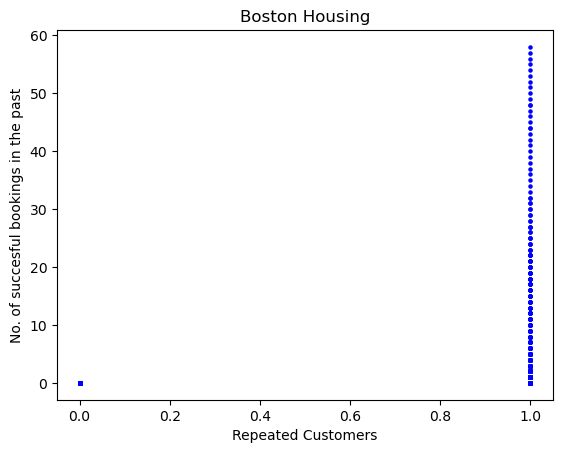

In [55]:
plt.scatter(x = reservations.repeated_guest, y = reservations.no_of_previous_bookings_not_canceled , s=5, color="blue")
plt.title("Boston Housing")
plt.xlabel("Repeated Customers")
plt.ylabel("No. of succesful bookings in the past")

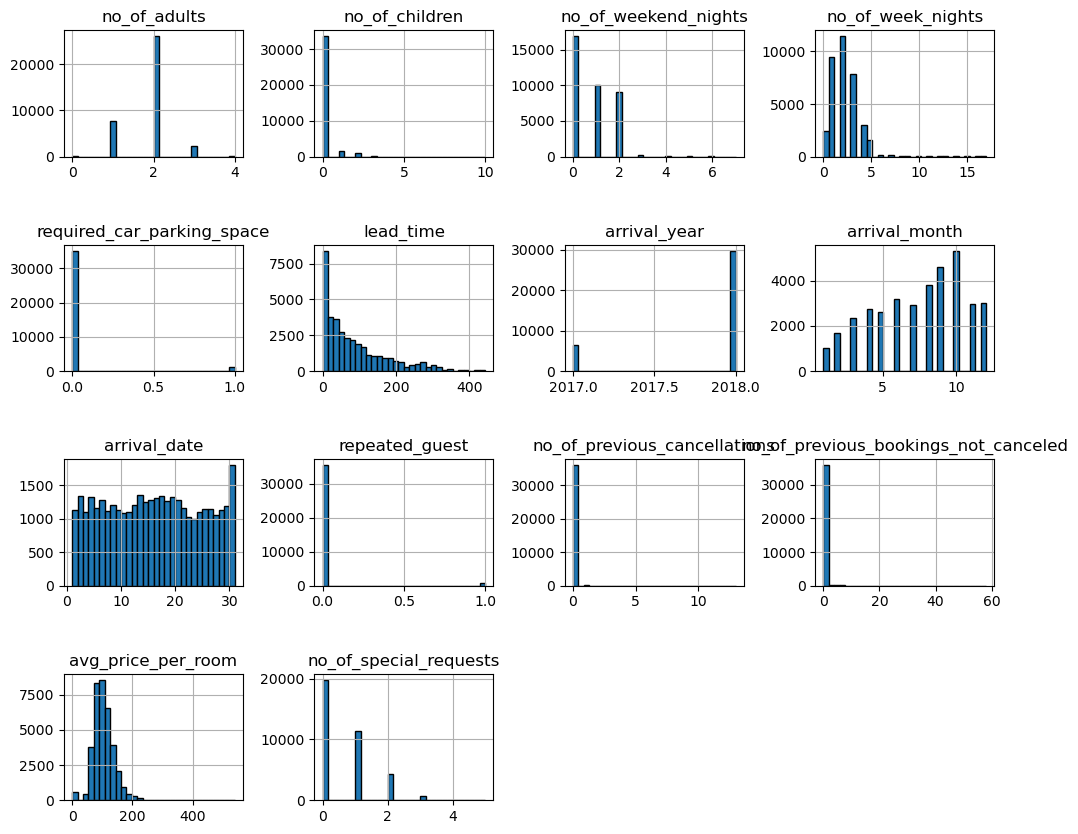

In [56]:
#Create a Scatter plot of medv vs age of the house

reservations.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [57]:
plt.scatter(x = reservations.required_car_parking_space, y = reservations.repeated_guest) , s=5, color="blue")
plt.title("Boston Housing")
plt.xlabel("Repeated Customers")
plt.ylabel("No. of succesful bookings in the past")

SyntaxError: cannot assign to function call (1447406548.py, line 1)

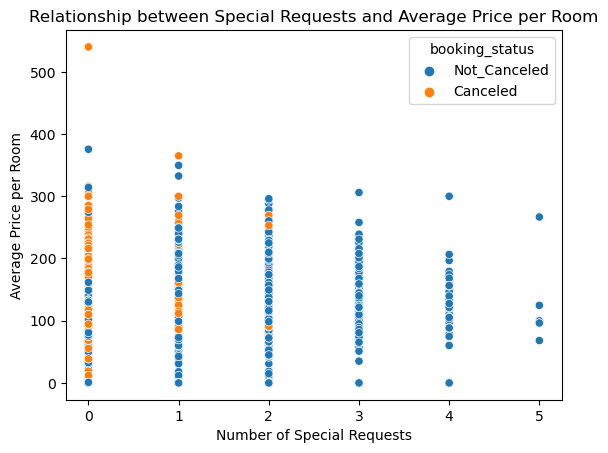

In [58]:
#Plotting a scatterplot of the number of special requests and average price per room to see 
#if there is a relationship between them
sns.scatterplot(x='no_of_special_requests', y='avg_price_per_room', hue='booking_status', data=reservations)
plt.title('Relationship between Special Requests and Average Price per Room')
plt.xlabel('Number of Special Requests')
plt.ylabel('Average Price per Room')
plt.show()

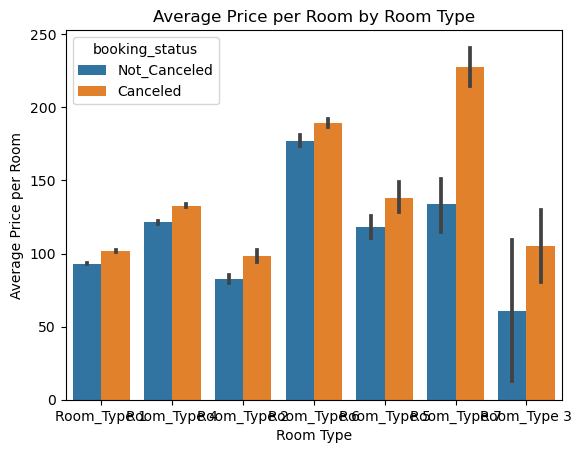

In [59]:
#Plotting a bar chart of the average price per room by room type
sns.barplot(x='room_type_reserved', y='avg_price_per_room', hue='booking_status', data=reservations)
plt.title('Average Price per Room by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price per Room')
plt.show()

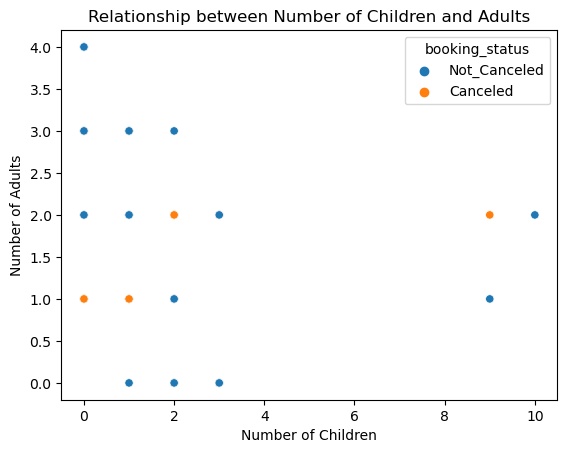

In [60]:
#Plotting a scatterplot of the number of children and adults to see their relationship
sns.scatterplot(x='no_of_children', y='no_of_adults', hue='booking_status', data=reservations)
plt.title('Relationship between Number of Children and Adults')
plt.xlabel('Number of Children')
plt.ylabel('Number of Adults')
plt.show()

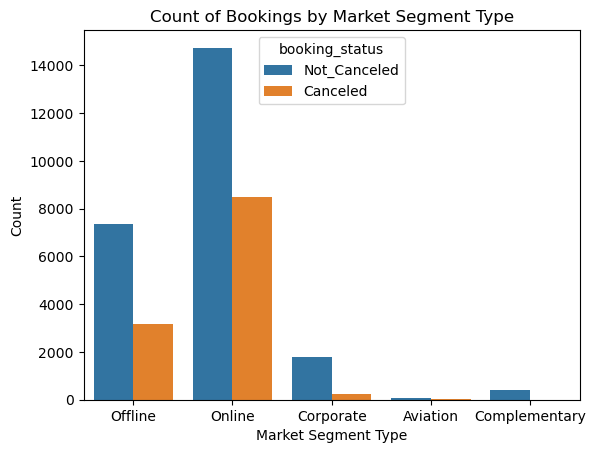

In [61]:
#Plotting a bar chart of the count of bookings by market segment type
sns.countplot(x='market_segment_type', hue='booking_status', data=reservations)
plt.title('Count of Bookings by Market Segment Type')
plt.xlabel('Market Segment Type')
plt.ylabel('Count')
plt.show()

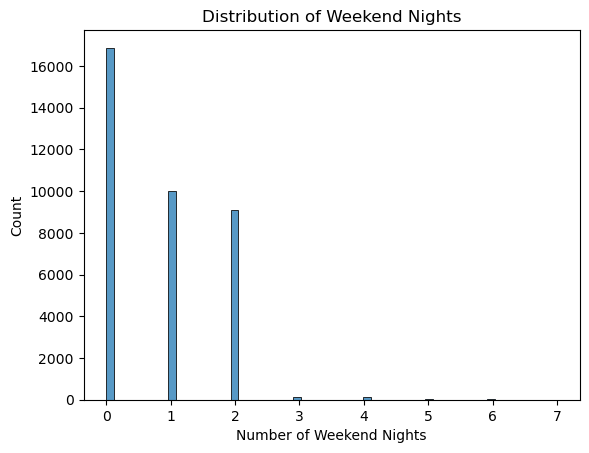

In [62]:
#Plotting a histogram of the number of weekend nights to see its distribution
sns.histplot(x='no_of_weekend_nights', data=reservations)
plt.title('Distribution of Weekend Nights')
plt.xlabel('Number of Weekend Nights')
plt.show()

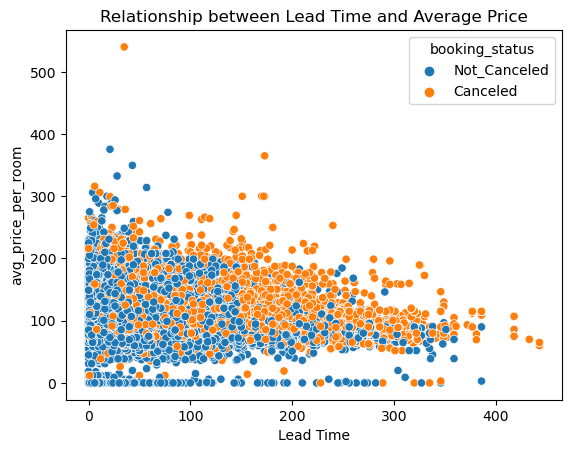

In [63]:
#Plotting a scatterplot of the lead time and average price per room to see their relationship
sns.scatterplot(x='lead_time', y='avg_price_per_room', hue='booking_status', data=reservations)
plt.title('Relationship between Lead Time and Average Price')
plt.xlabel('Lead Time')
plt.show()

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [69]:
reservations_x = reservations.drop('Booking_ID', axis=1)
reservations_x = pd.get_dummies(reservations_x, columns=['type_of_meal_plan'])
reservations_x = pd.get_dummies(reservations_x, columns=['room_type_reserved'])
reservations_x = pd.get_dummies(reservations_x, columns=['market_segment_type'])

reservations_x['booking_status'] = (reservations_x['booking_status'] == 'Not_Canceled').astype(int)

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(reservations_x.drop('booking_status', axis=1), 
                                                    reservations_x['booking_status'], 
                                                    test_size=0.2, 
                                                    random_state=42)
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Evaluate the model on the testing set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred.round())

print(f"Accuracy: {accuracy}")

Accuracy: 0.8002756719503791


In [72]:
reservation_data_modified = reservations.drop(['arrival_date', 'arrival_month', 'required_car_parking_space', 'no_of_previous_bookings_not_canceled'], axis=1)
reservation_data_modified.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,room_type_reserved,lead_time,arrival_year,market_segment_type,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,Room_Type 1,224,2017,Offline,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,Room_Type 1,5,2018,Online,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,Room_Type 1,1,2018,Online,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,Room_Type 1,211,2018,Online,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,Room_Type 1,48,2018,Online,0,0,94.50,0,Canceled


In [73]:
reservations_x.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,...,0,0,0,0,0,0,0,0,0,1
